# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For train-test split and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# StatsModels for detailed summary (optional)
import statsmodels.api as sm

### **1.1 Load the Data**

In [3]:
# Load the dataset

import pandas as pd
df = pd.read_csv('/content/Employee_data.csv')

In [4]:
# Check the first few entries

df.head()


Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [5]:
# Inspect the shape of the dataset

df.shape

(74610, 24)

In [6]:
# Inspect the different columns in the dataset

df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [7]:
 # Check the summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

### **1.3 Check the data type of columns**

In [8]:
# Check the info to see the types of the feature variables and the null values present

df.info()

# Check missing values in each column
print("\nMissing Values:\n")
print(df.isnull().sum()[df.isnull().sum() > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [9]:
# Check the number of missing values in each column
missing_values = df.isnull().sum()

# Filter only columns with missing values
missing_values = missing_values[missing_values > 0]

# Display the result
print("Missing Values in Each Column:\n")
print(missing_values)

Missing Values in Each Column:

Distance from Home            1912
Company Tenure (In Months)    2413
dtype: int64


2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [10]:
# Check the percentage of missing values in each column

missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Round to 2 decimal places and display
print("Percentage of Missing Values in Each Column:\n")
print(missing_percentage.round(2))


Percentage of Missing Values in Each Column:

Distance from Home            2.56
Company Tenure (In Months)    3.23
dtype: float64


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [11]:
# Handle the missing value rows in the column
# Check shape before dropping
print("Shape before dropping missing values:", df.shape)

# Drop rows with any missing values
df = df.dropna()

# Check shape after dropping
print("Shape after dropping missing values:", df.shape)

# Verify no more missing values
print("\nRemaining Missing Values (should be 0):")
print(df.isnull().sum()[df.isnull().sum() > 0])


Shape before dropping missing values: (74610, 24)
Shape after dropping missing values: (70635, 24)

Remaining Missing Values (should be 0):
Series([], dtype: int64)


2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [12]:
# Check the percentage of remaining data after missing values are removed
# Calculate total rows before and after dropping
total_rows_before = 74610  # Original dataset size
total_rows_after = len(df)  # After dropping missing values

# Calculate percentage of data retained
retained_percentage = (total_rows_after / total_rows_before) * 100

# Display result
print(f" Percentage of data retained after dropping missing values: {retained_percentage:.2f}%")


 Percentage of data retained after dropping missing values: 94.67%


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [13]:
# Write a function to display the categorical columns with their unique values and check for redundant values
# Function to display unique values in each categorical column
def display_categorical_unique_values(dataframe):
    print(" Unique Values in Categorical Columns:\n")
    categorical_cols = dataframe.select_dtypes(include='object').columns

    for col in categorical_cols:
        unique_vals = dataframe[col].unique()
        print(f"{col} ({len(unique_vals)} unique values): {unique_vals}\n")

# Call the function
display_categorical_unique_values(df)

 Unique Values in Categorical Columns:

Gender (2 unique values): ['Male' 'Female']

Job Role (5 unique values): ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']

Work-Life Balance (4 unique values): ['Excellent' 'Poor' 'Good' 'Fair']

Job Satisfaction (4 unique values): ['Medium' 'High' 'Very High' 'Low']

Performance Rating (4 unique values): ['Average' 'Low' 'High' 'Below Average']

Overtime (2 unique values): ['No' 'Yes']

Education Level (5 unique values): ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']

Marital Status (3 unique values): ['Married' 'Divorced' 'Single']

Job Level (3 unique values): ['Mid' 'Senior' 'Entry']

Company Size (3 unique values): ['Medium' 'Small' 'Large']

Remote Work (2 unique values): ['No' 'Yes']

Leadership Opportunities (2 unique values): ['No' 'Yes']

Innovation Opportunities (2 unique values): ['No' 'Yes']

Company Reputation (4 unique values): ['Excellent' 'Fair' 'Poor' 'Good']

Employee Recognition (4

In [14]:
# Check the data

# View first 5 rows of the dataset
print("First 5 Rows:\n")
print(df.head())

# View last 5 rows of the dataset
print("\nLast 5 Rows:\n")
print(df.tail())

# View random 5 rows
print("\nRandom 5 Rows:\n")
print(df.sample(5))

# Get column names
print("\nColumn Names:\n")
print(df.columns.tolist())

# Check the shape of the dataset
print("\nDataset Shape (rows, columns):", df.shape)

# Basic summary of dataset
print("\nDataset Summary:\n")
print(df.describe(include='all'))


First 5 Rows:

   Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Le

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [15]:
# Drop redundant columns which are not required for modelling

# View all column names
print("All Column Names:\n")
print(df.columns.tolist())

# List columns to drop
columns_to_drop = ['Employee ID', 'Employee Name', 'Email', 'Phone Number']

# Drop those columns (only if they exist)
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Confirm changes
print("Columns after dropping redundant ones:\n")
print(df.columns.tolist())


All Column Names:

['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']
Columns after dropping redundant ones:

['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


In [16]:
# Check first few rows of data

# Display the first 5 rows of the dataset
print("First 5 Rows of the Data:\n")
print(df.head())


First 5 Rows of the Data:

   Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  ...  Number of Dependents Job Level Company Size  \
0       No  ...                     0

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [17]:
# Import Train Test Split
from sklearn.model_selection import train_test_split


### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [18]:
# Define feature matrix (X) and target vector (y)
X = df.drop("Attrition", axis=1)
y = df["Attrition"]
# Display their shapes
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (70635, 22)
Target (y) shape: (70635,)


### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [19]:
# Split the data into 70% train data and 30% validation data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print shapes
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (49444, 22)
X_val shape: (21191, 22)
y_train shape: (49444,)
y_val shape: (21191,)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [20]:
# Select numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create a new DataFrame with only numerical columns
X_numerical = X[numerical_cols]

# Display result
print("Numerical Columns:\n", numerical_cols.tolist())
print("\nShape of numerical feature set:", X_numerical.shape)


Numerical Columns:
 ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']

Shape of numerical feature set: (70635, 7)


4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

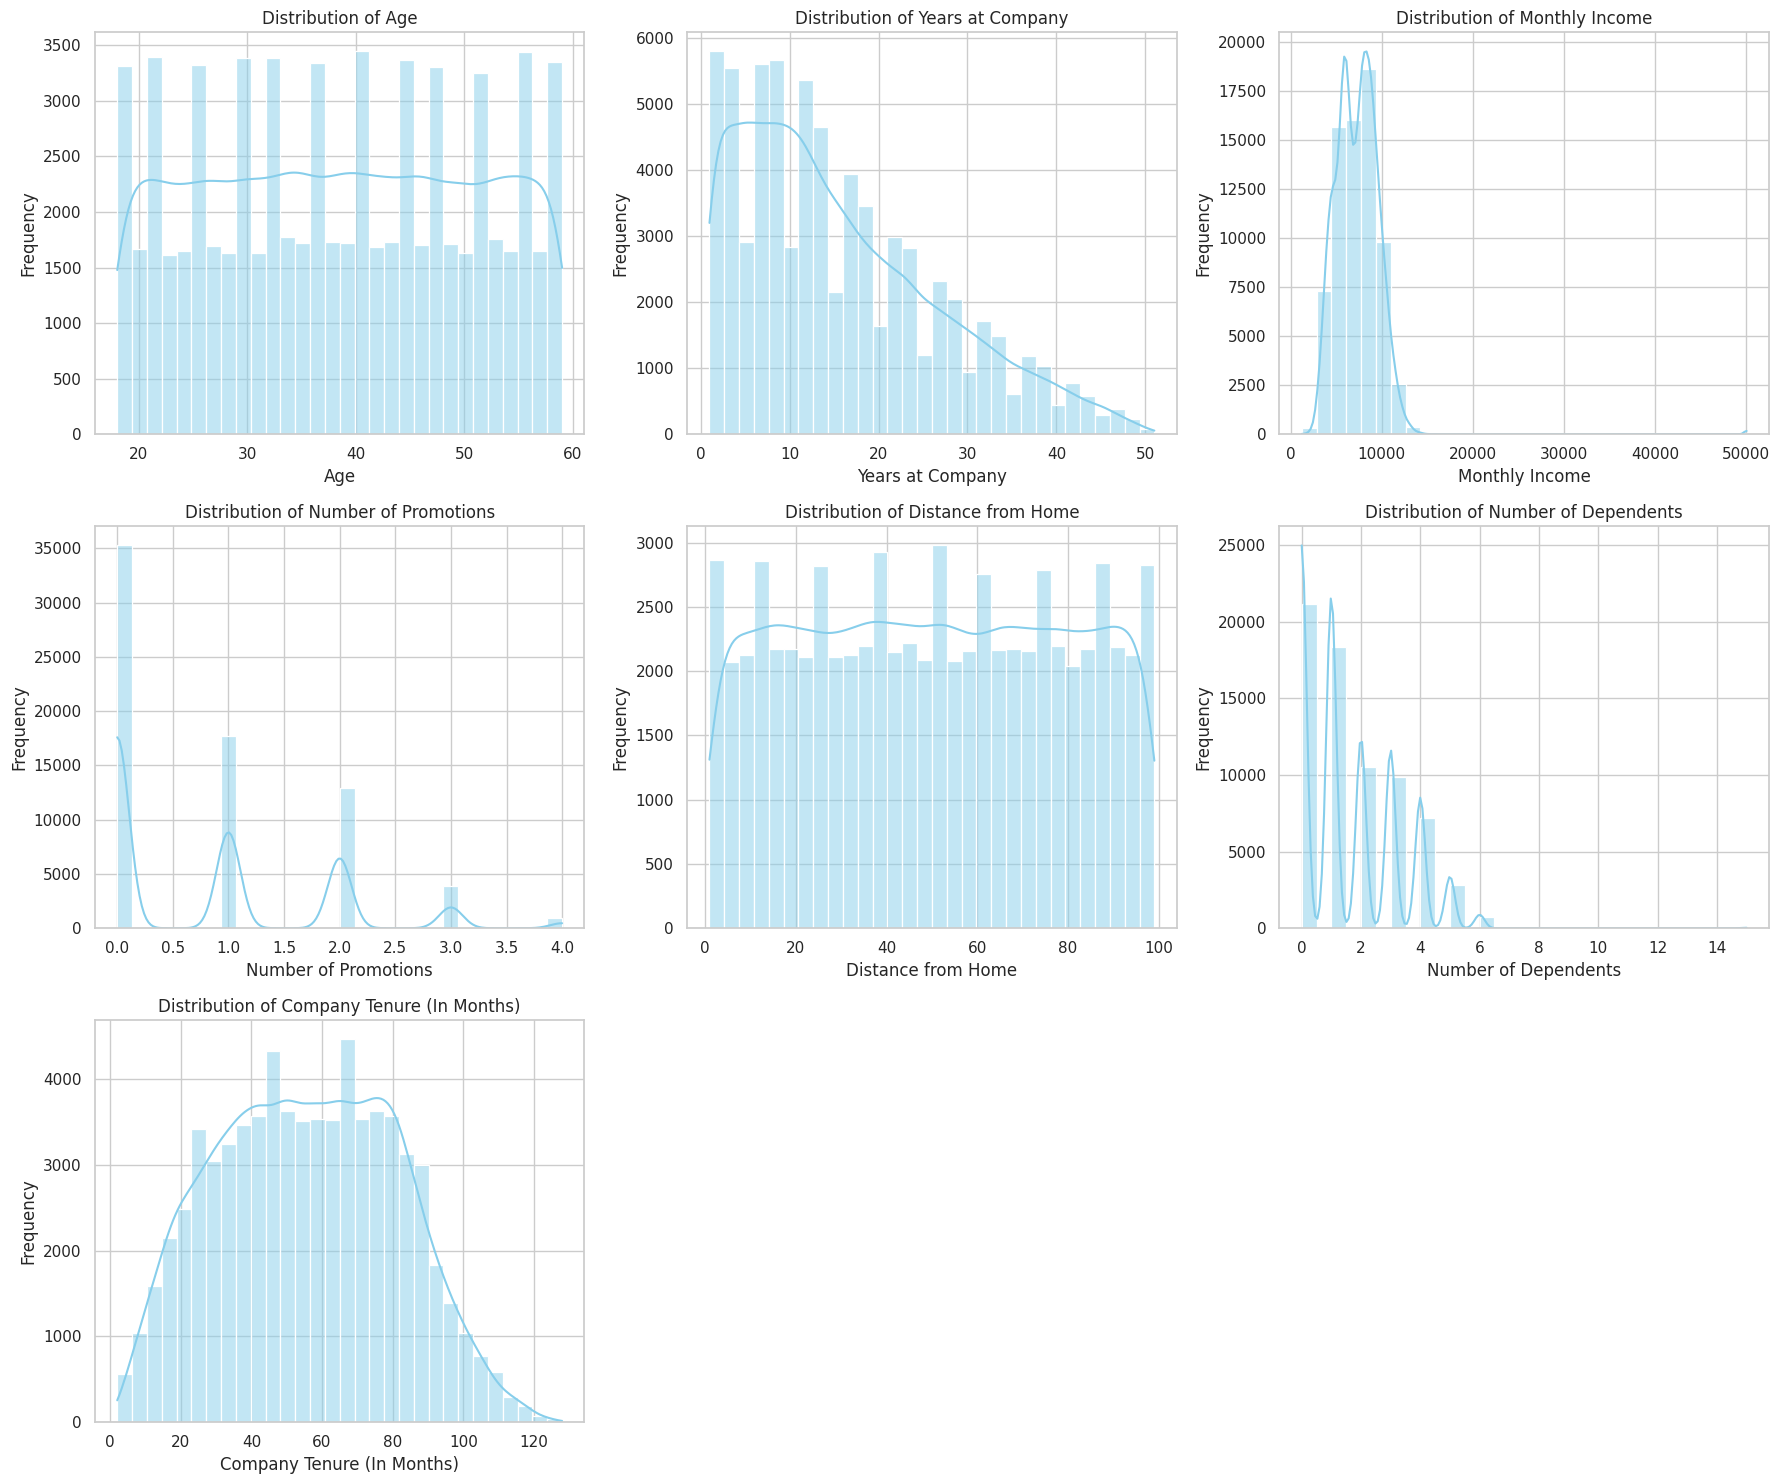

In [21]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Number of numerical columns
num_cols = X_numerical.columns
num_plots = len(num_cols)

# Define plot layout
n_rows = (num_plots + 2) // 3  # 3 plots per row
plt.figure(figsize=(18, 5 * n_rows))

# Plot each numerical column
for idx, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, 3, idx)
    sns.histplot(X_numerical[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

In [22]:
# Compute correlation matrix for numerical columns
correlation_matrix = X_numerical.corr()

# Set plot size and style
plt.figure(figsize=(12, 10))
sns.set(style="white")

# Plot heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})

# Add title
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()


### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

Target Variable Distribution in Training Set:

Attrition
Stayed    25767
Left      23677
Name: count, dtype: int64


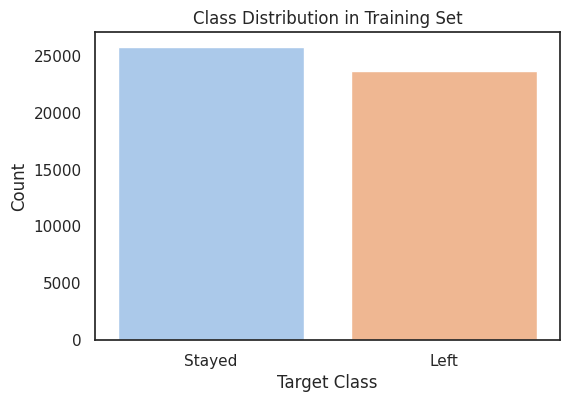

In [23]:
# Check value counts of target variable in training set
print("Target Variable Distribution in Training Set:\n")
print(y_train.value_counts())

# Plot bar chart of class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='pastel')
plt.title("Class Distribution in Training Set")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

Categorical Columns:
 ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


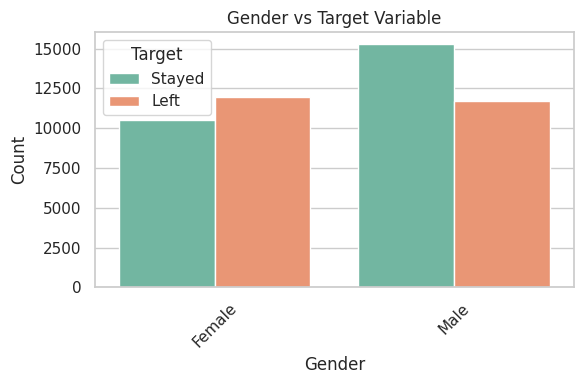

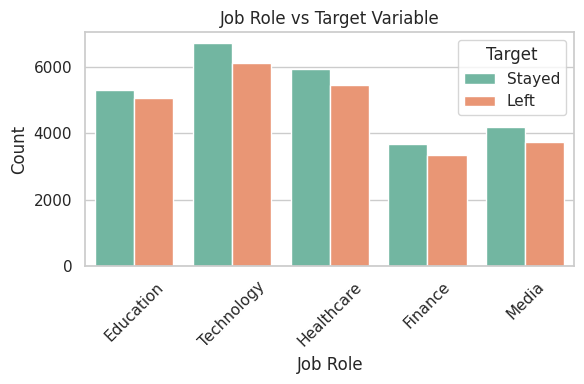

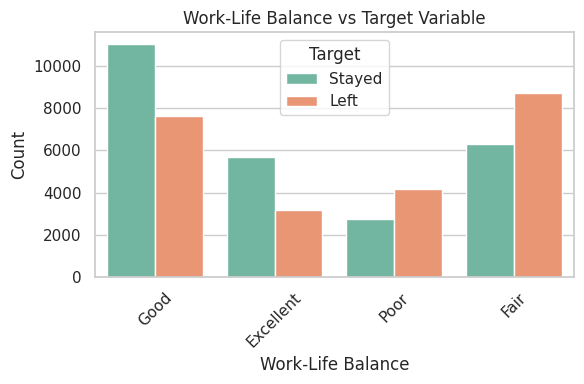

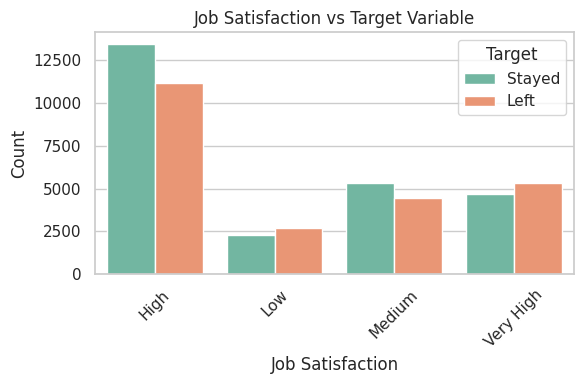

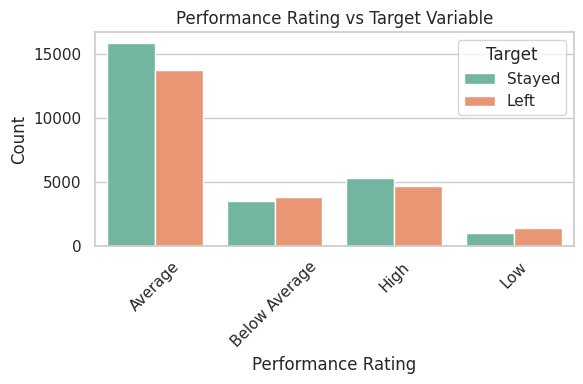

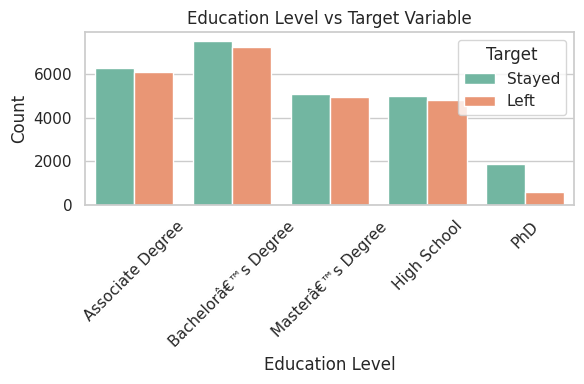

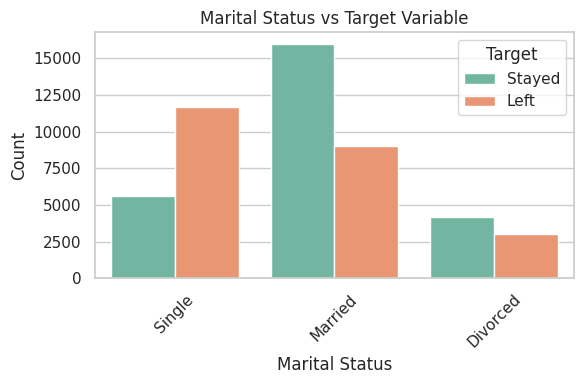

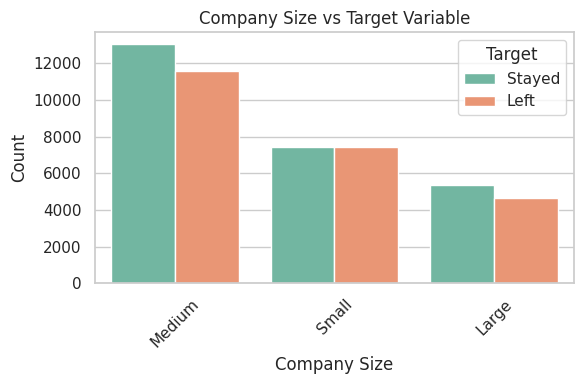

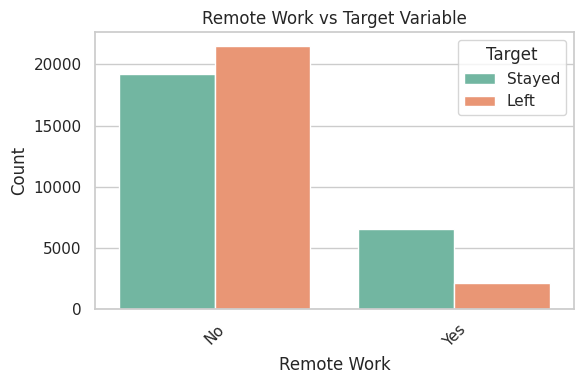

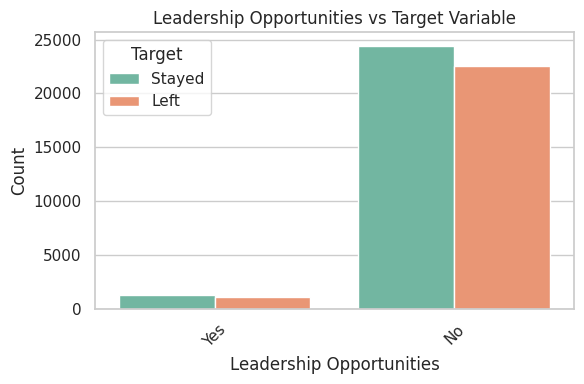

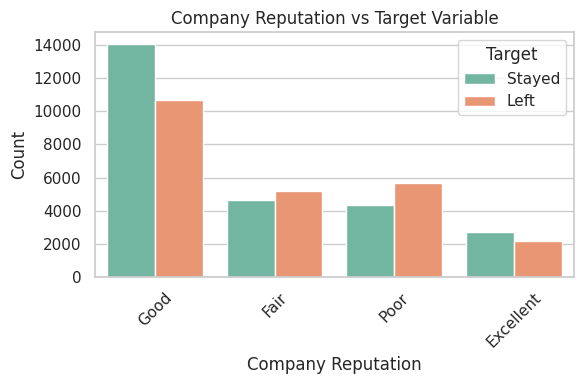

In [24]:
# Plot distribution for each categorical column with target variable

# Select categorical columns from X_train
categorical_cols = X_train.select_dtypes(include='object').columns

# Display all categorical column names
print("Categorical Columns:\n", categorical_cols.tolist())

# Set plot style
sns.set(style="whitegrid")

# Plot countplots for each categorical column against target
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=X_train.join(y_train), x=col, hue=y_train, palette='Set2')
    plt.title(f"{col} vs Target Variable")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Target")
    plt.tight_layout()
    plt.show()


## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [25]:
# Select numerical columns

# Select numerical columns from validation data
X_val_numerical = X_val.select_dtypes(include=['int64', 'float64'])

# Display selected numerical columns
print("Numerical Columns in Validation Data:\n", X_val_numerical.columns.tolist())
print("\nShape of numerical validation data:", X_val_numerical.shape)


Numerical Columns in Validation Data:
 ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']

Shape of numerical validation data: (21191, 7)


5.1.2 Plot distribution of numerical columns

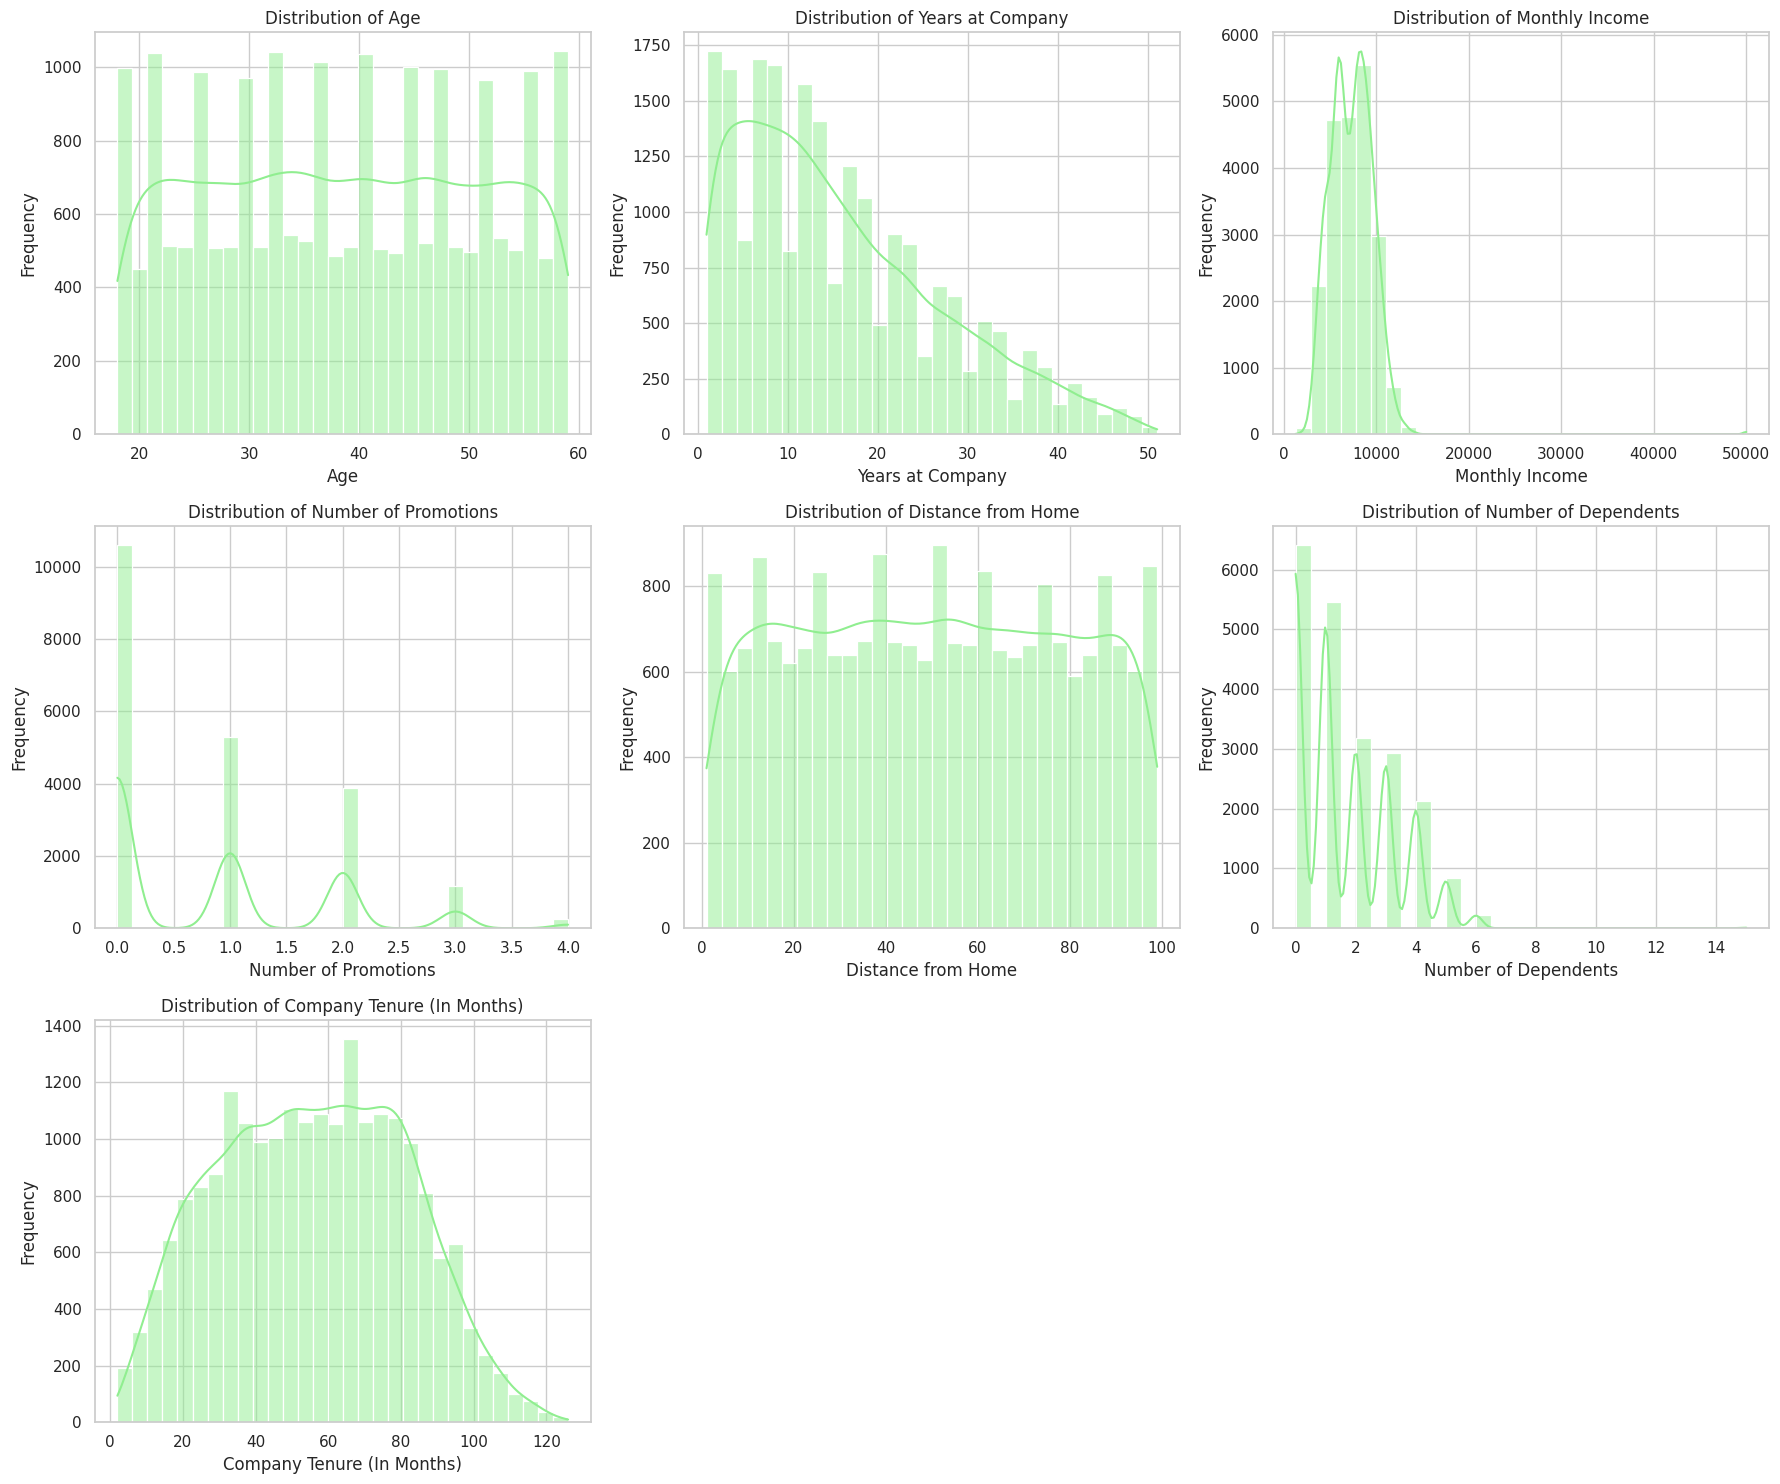

In [26]:
# Plot all the numerical columns to understand their distribution

# Set plot style
sns.set(style="whitegrid")

# Number of numerical columns
num_cols = X_val_numerical.columns
num_plots = len(num_cols)

# Define plot layout (3 columns per row)
n_rows = (num_plots + 2) // 3
plt.figure(figsize=(18, 5 * n_rows))

# Plot each column
for idx, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, 3, idx)
    sns.histplot(X_val_numerical[col], kde=True, bins=30, color='lightgreen')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [27]:
# Create correlation matrix for numerical columns

val_corr_matrix = X_val_numerical.corr()


# Plot Heatmap of the correlation matrix
# Set plot size and style
plt.figure(figsize=(12, 10))
sns.set(style="white")

# Plot heatmap
sns.heatmap(val_corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="YlGnBu",
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": 0.8})

# Add title
plt.title("Correlation Heatmap of Numerical Features (Validation Set)", fontsize=16)
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

Target Variable Distribution in Validation Set:

Attrition
Stayed    11043
Left      10148
Name: count, dtype: int64


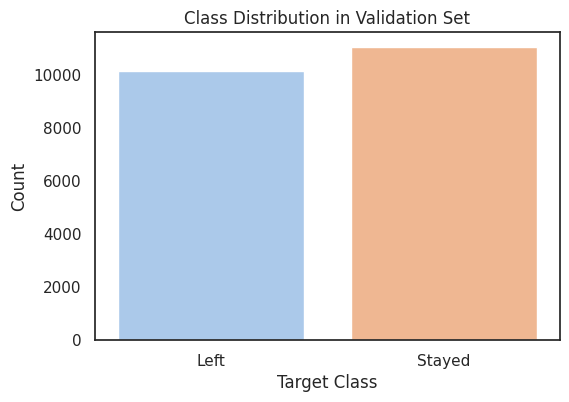

In [28]:
# Plot a bar chart to check class balance
# Check the distribution of target variable in validation set
print("Target Variable Distribution in Validation Set:\n")
print(y_val.value_counts())

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x=y_val, palette='pastel')
plt.title("Class Distribution in Validation Set")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

Categorical Columns in Validation Set:
 ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


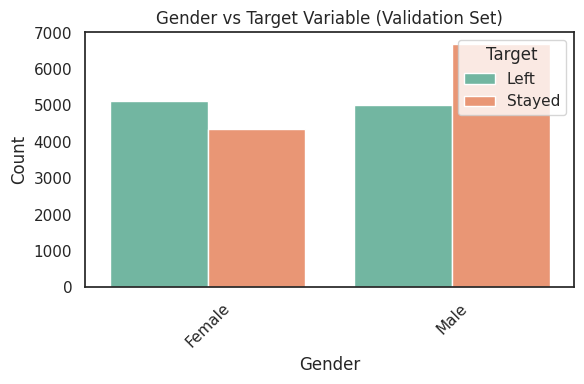

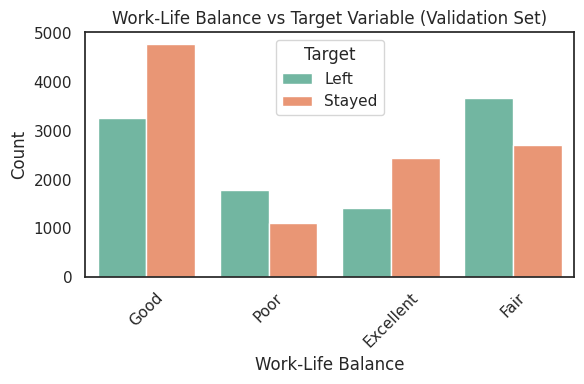

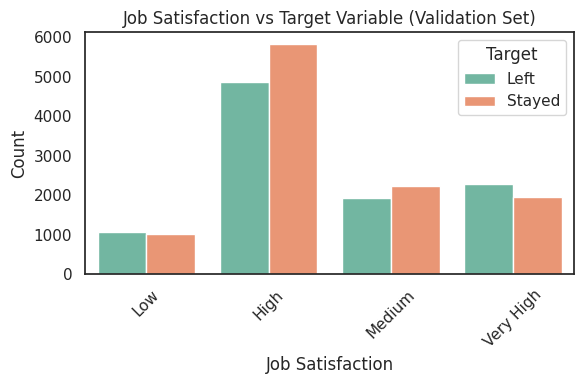

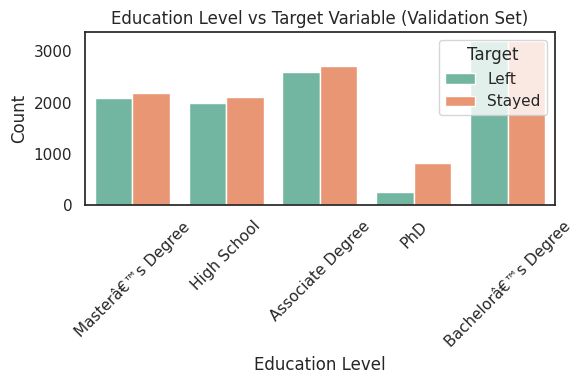

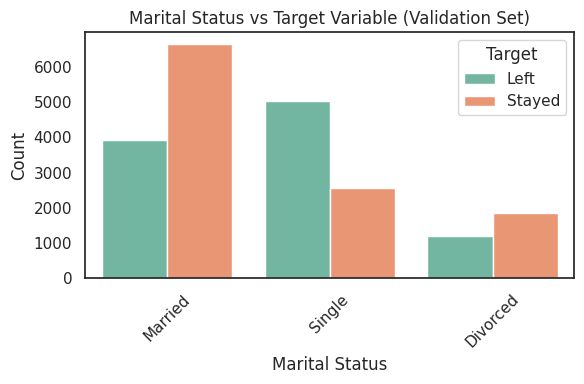

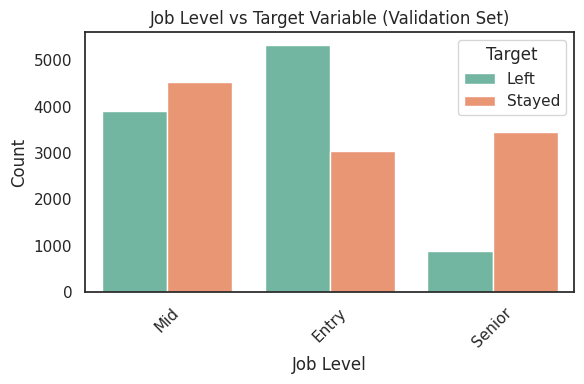

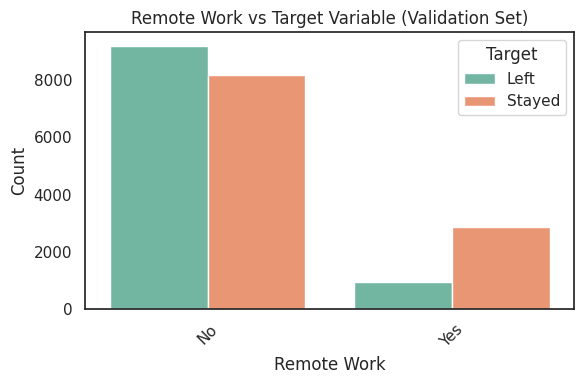

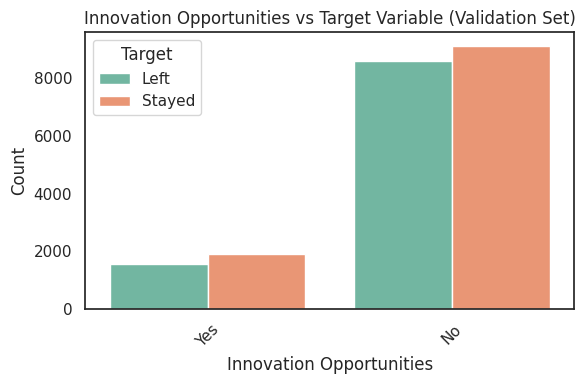

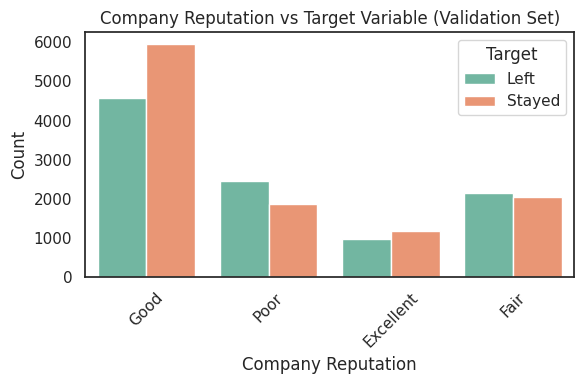

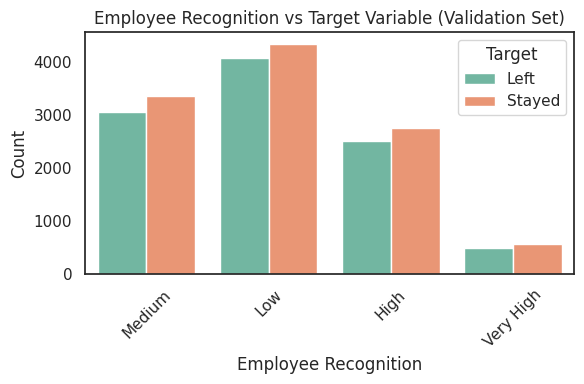

In [29]:
# Plot distribution for each categorical column with target variable
# Select categorical columns from validation data
categorical_cols_val = X_val.select_dtypes(include='object').columns

# Show categorical column names
print("Categorical Columns in Validation Set:\n", categorical_cols_val.tolist())

# Join X_val and y_val for plotting
val_data = X_val.join(y_val)

# Plot countplots for each categorical column vs target
for col in categorical_cols_val:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=val_data, x=col, hue=y_val, palette='Set2')
    plt.title(f"{col} vs Target Variable (Validation Set)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Target")
    plt.tight_layout()
    plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [30]:
# Check the categorical columns
# Select categorical columns from training set
categorical_cols = X_train.select_dtypes(include='object').columns

# Display categorical columns and their unique values
print("Categorical Columns and Unique Values:\n")
for col in categorical_cols:
    print(f"{col}: {X_train[col].nunique()} unique values")
    print(f"  Values: {X_train[col].unique()}\n")


Categorical Columns and Unique Values:

Gender: 2 unique values
  Values: ['Female' 'Male']

Job Role: 5 unique values
  Values: ['Education' 'Technology' 'Healthcare' 'Finance' 'Media']

Work-Life Balance: 4 unique values
  Values: ['Good' 'Excellent' 'Poor' 'Fair']

Job Satisfaction: 4 unique values
  Values: ['High' 'Low' 'Medium' 'Very High']

Performance Rating: 4 unique values
  Values: ['Average' 'Below Average' 'High' 'Low']

Overtime: 2 unique values
  Values: ['Yes' 'No']

Education Level: 5 unique values
  Values: ['Associate Degree' 'Bachelorâ€™s Degree' 'Masterâ€™s Degree'
 'High School' 'PhD']

Marital Status: 3 unique values
  Values: ['Single' 'Married' 'Divorced']

Job Level: 3 unique values
  Values: ['Mid' 'Senior' 'Entry']

Company Size: 3 unique values
  Values: ['Medium' 'Small' 'Large']

Remote Work: 2 unique values
  Values: ['No' 'Yes']

Leadership Opportunities: 2 unique values
  Values: ['Yes' 'No']

Innovation Opportunities: 2 unique values
  Values: ['No' '

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [31]:
# Create dummy variables using the 'get_dummies' for independent columns
# Use get_dummies to encode categorical columns
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Display the shape after encoding
print("Shape after encoding categorical features in training data:", X_train_encoded.shape)

# Add the results to the master DataFrame
# Encode validation data
X_val_encoded = pd.get_dummies(X_val, drop_first=True)

# Align validation data columns with training data (to ensure same feature space)
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Final shapes
print("Training data shape:", X_train_encoded.shape)
print("Validation data shape:", X_val_encoded.shape)


Shape after encoding categorical features in training data: (49444, 41)
Training data shape: (49444, 41)
Validation data shape: (21191, 41)


Now, drop the original categorical columns and check the DataFrame

In [32]:
# Drop original categorical columns from training and validation data
X_train_cleaned = X_train.drop(columns=categorical_cols)
X_val_cleaned = X_val.drop(columns=categorical_cols)

# Confirm shape before merging with encoded dummies
print("Training shape after dropping categorical columns:", X_train_cleaned.shape)
print("Validation shape after dropping categorical columns:", X_val_cleaned.shape)

# Create final encoded datasets by combining numerical and dummy-encoded data
X_train_final = pd.concat([X_train_cleaned, pd.get_dummies(X_train[categorical_cols], drop_first=True)], axis=1)
X_val_final = pd.concat([X_val_cleaned, pd.get_dummies(X_val[categorical_cols], drop_first=True)], axis=1)

# Ensure validation columns match training columns
X_val_final = X_val_final.reindex(columns=X_train_final.columns, fill_value=0)

# Display final shapes
print("Final training data shape:", X_train_final.shape)
print("Final validation data shape:", X_val_final.shape)

# Show first few rows
X_train_final.head()


Training shape after dropping categorical columns: (49444, 7)
Validation shape after dropping categorical columns: (21191, 7)
Final training data shape: (49444, 41)
Final validation data shape: (21191, 41)


Age  Years at Company  Monthly Income  Number of Promotions  \
58605   57                44            5381                     2   
61696   20                 9            9466                     0   
30474   48                 3           11420                     0   
52506   41                13           10092                     2   
1965    22                 2            7434                     0   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
58605                27.0                     4                        90.0   
61696                92.0                     1                        11.0   
30474                98.0                     2                        51.0   
52506                53.0                     1                        82.0   
1965                  6.0                     0                        64.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
58605        False             False                False  ...   
61696        False             False                False  ...   
30474         True             False                False  ...   
52506        False             False                False  ...   
1965         False             False                 True  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
58605               False            False                          True   
61696               False            False                         False   
30474               False            False                         False   
52506                True             True                         False   
1965                False            False                         False   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
58605                         False                    False   
61696                         False                     True   
30474                         False                     True   
52506                         False                    False   
1965                          False                     True   

       Company Reputation_Good  Company Reputation_Poor  \
58605                     True                    False   
61696                    False                    False   
30474                    False                    False   
52506                    False                     True   
1965                     False                    False   

       Employee Recognition_Low  Employee Recognition_Medium  \
58605                      True                        False   
61696                      True                        False   
30474                      True                        False   
52506                     False                         True   
1965                      False                        False   

       Employee Recognition_Very High  
58605                           False  
61696                           False  
30474                           False  
52506                           False  
1965                            False  

[5 rows x 41 columns]

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [33]:
# Create dummy variables using the 'get_dummies' for independent columns
# Create dummy variables for training data
X_train_dummies = pd.get_dummies(X_train, drop_first=True)

# Create dummy variables for validation data
X_val_dummies = pd.get_dummies(X_val, drop_first=True)

# Ensure both have the same columns
X_val_dummies = X_val_dummies.reindex(columns=X_train_dummies.columns, fill_value=0)

# Add the results to the master DataFrame
# Check final shapes
print("Encoded Training Data Shape:", X_train_dummies.shape)
print("Encoded Validation Data Shape:", X_val_dummies.shape)

# View top rows
X_train_dummies.head()



Encoded Training Data Shape: (49444, 41)
Encoded Validation Data Shape: (21191, 41)


Age  Years at Company  Monthly Income  Number of Promotions  \
58605   57                44            5381                     2   
61696   20                 9            9466                     0   
30474   48                 3           11420                     0   
52506   41                13           10092                     2   
1965    22                 2            7434                     0   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
58605                27.0                     4                        90.0   
61696                92.0                     1                        11.0   
30474                98.0                     2                        51.0   
52506                53.0                     1                        82.0   
1965                  6.0                     0                        64.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
58605        False             False                False  ...   
61696        False             False                False  ...   
30474         True             False                False  ...   
52506        False             False                False  ...   
1965         False             False                 True  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
58605               False            False                          True   
61696               False            False                         False   
30474               False            False                         False   
52506                True             True                         False   
1965                False            False                         False   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
58605                         False                    False   
61696                         False                     True   
30474                         False                     True   
52506                         False                    False   
1965                          False                     True   

       Company Reputation_Good  Company Reputation_Poor  \
58605                     True                    False   
61696                    False                    False   
30474                    False                    False   
52506                    False                     True   
1965                     False                    False   

       Employee Recognition_Low  Employee Recognition_Medium  \
58605                      True                        False   
61696                      True                        False   
30474                      True                        False   
52506                     False                         True   
1965                      False                        False   

       Employee Recognition_Very High  
58605                           False  
61696                           False  
30474                           False  
52506                           False  
1965                            False  

[5 rows x 41 columns]

Now, drop the original categorical columns and check the DataFrame

In [34]:
# Drop categorical columns and check the DataFrame
# Identify categorical columns in the original data
categorical_cols = X_train.select_dtypes(include='object').columns
print("Categorical Columns to Drop:\n", categorical_cols.tolist())

# Drop original categorical columns from X_train and X_val
X_train_num = X_train.drop(columns=categorical_cols)
X_val_num = X_val.drop(columns=categorical_cols)

# Display shape after dropping
print("Shape after dropping categorical columns:")
print("Training Data:", X_train_num.shape)
print("Validation Data:", X_val_num.shape)

# Create dummy variables
X_train_dummies = pd.get_dummies(X_train[categorical_cols], drop_first=True)
X_val_dummies = pd.get_dummies(X_val[categorical_cols], drop_first=True)

# Reindex validation dummies to match training
X_val_dummies = X_val_dummies.reindex(columns=X_train_dummies.columns, fill_value=0)

# Combine numeric + encoded categorical data
X_train_final = pd.concat([X_train_num, X_train_dummies], axis=1)
X_val_final = pd.concat([X_val_num, X_val_dummies], axis=1)

# Check final DataFrame
print("Final X_train shape:", X_train_final.shape)
print("Final X_val shape:", X_val_final.shape)
X_train_final.head()


Categorical Columns to Drop:
 ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']
Shape after dropping categorical columns:
Training Data: (49444, 7)
Validation Data: (21191, 7)
Final X_train shape: (49444, 41)
Final X_val shape: (21191, 41)


Age  Years at Company  Monthly Income  Number of Promotions  \
58605   57                44            5381                     2   
61696   20                 9            9466                     0   
30474   48                 3           11420                     0   
52506   41                13           10092                     2   
1965    22                 2            7434                     0   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
58605                27.0                     4                        90.0   
61696                92.0                     1                        11.0   
30474                98.0                     2                        51.0   
52506                53.0                     1                        82.0   
1965                  6.0                     0                        64.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
58605        False             False                False  ...   
61696        False             False                False  ...   
30474         True             False                False  ...   
52506        False             False                False  ...   
1965         False             False                 True  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
58605               False            False                          True   
61696               False            False                         False   
30474               False            False                         False   
52506                True             True                         False   
1965                False            False                         False   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
58605                         False                    False   
61696                         False                     True   
30474                         False                     True   
52506                         False                    False   
1965                          False                     True   

       Company Reputation_Good  Company Reputation_Poor  \
58605                     True                    False   
61696                    False                    False   
30474                    False                    False   
52506                    False                     True   
1965                     False                    False   

       Employee Recognition_Low  Employee Recognition_Medium  \
58605                      True                        False   
61696                      True                        False   
30474                      True                        False   
52506                     False                         True   
1965                      False                        False   

       Employee Recognition_Very High  
58605                           False  
61696                           False  
30474                           False  
52506                           False  
1965                            False  

[5 rows x 41 columns]

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [35]:
# Convert y_train and y_validation to DataFrame to create dummy variables
# Convert to DataFrame
y_train_df = pd.DataFrame(y_train, columns=['Retention'])
y_val_df = pd.DataFrame(y_val, columns=['Retention'])

# Preview
print("y_train DataFrame:")
print(y_train_df.head())

print("\ny_val DataFrame:")
print(y_val_df.head())


y_train DataFrame:
Empty DataFrame
Columns: [Retention]
Index: []

y_val DataFrame:
Empty DataFrame
Columns: [Retention]
Index: []


6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [36]:
# Create dummy variables using the 'get_dummies' for dependent column
# Convert y_train to DataFrame
y_train_df = pd.DataFrame(y_train, columns=['Retention'])

# Create dummy variables
y_train_dummies = pd.get_dummies(y_train_df, drop_first=True)

# Display the result
print("Encoded y_train:")
print(y_train_dummies.head())

# Repeat for validation set
y_val_df = pd.DataFrame(y_val, columns=['Retention'])
y_val_dummies = pd.get_dummies(y_val_df, drop_first=True)

Encoded y_train:
Empty DataFrame
Columns: []
Index: []


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [37]:
# Create dummy variables using the 'get_dummies' for dependent column
# Convert y_val to DataFrame (if it's a Series)
y_val_df = pd.DataFrame(y_val, columns=['Retention'])

# Create dummy variables using get_dummies
y_val_dummies = pd.get_dummies(y_val_df, drop_first=True)

# Display result
print("Encoded y_val:")
print(y_val_dummies.head())


Encoded y_val:
Empty DataFrame
Columns: []
Index: []


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [38]:
# Drop redundant columns from both train and validation
# Check for redundant columns manually or use below logic
redundant_cols = []

# Example: check for single unique value
for col in X_train_final.columns:
    if X_train_final[col].nunique() == 1:
        redundant_cols.append(col)

# Add any known redundant columns
# redundant_cols += ['EmployeeID', 'UnnecessaryColumn']

print("Redundant columns to drop:", redundant_cols)

# Drop from training and validation
X_train_final = X_train_final.drop(columns=redundant_cols)
X_val_final = X_val_final.drop(columns=redundant_cols)

# Confirm final shape
print("Final X_train shape after dropping:", X_train_final.shape)
print("Final X_val shape after dropping:", X_val_final.shape)



Redundant columns to drop: []
Final X_train shape after dropping: (49444, 41)
Final X_val shape after dropping: (21191, 41)


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [39]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [40]:
# Scale the numeric features present in the training set
# Identify numeric columns
numeric_cols = X_train_final.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit and transform training numeric features
X_train_final[numeric_cols] = scaler.fit_transform(X_train_final[numeric_cols])

# Scale the numerical features present in the validation set
# Apply the same scaler (do not refit!) to validation data
X_val_final[numeric_cols] = scaler.transform(X_val_final[numeric_cols])
# Check scaled training data
print("Scaled Training Data Preview:")
print(X_train_final[numeric_cols].head())

# Check scaled validation data
print("\nScaled Validation Data Preview:")
print(X_val_final[numeric_cols].head())


Scaled Training Data Preview:
            Age  Years at Company  Monthly Income  Number of Promotions  \
58605  1.528049          2.526735       -0.765453              1.172861   
61696 -1.534625         -0.596692        0.828294             -0.835796   
30474  0.783074         -1.132136        1.590639             -0.835796   
52506  0.203649         -0.239729        1.072525              1.172861   
1965  -1.369075         -1.221377        0.035517             -0.835796   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  
58605           -0.806784              1.489475                    1.351007  
61696            1.467305             -0.417685                   -1.763741  
30474            1.677221              0.218035                   -0.186653  
52506            0.102851             -0.417685                    1.035590  
1965            -1.541490             -1.053404                    0.325900  

Scaled Validation Data Preview:
            Age  Y

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [41]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression

# Create the logistic regression object
logreg = LogisticRegression(max_iter=1000, random_state=42)



7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [42]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE


# Recreate y_train as a DataFrame
y_train_df = pd.DataFrame(y_train, columns=['Attrition'])

# Create dummy variables with drop_first=True (this will create a column for 'Left')
y_train_dummies = pd.get_dummies(y_train_df, drop_first=True)

# Optional: Rename for clarity (optional but clean)
y_train_dummies.columns = ['Left']

# Check again
print("y_train_dummies shape:", y_train_dummies.shape)
print(y_train_dummies.head())

print(y_train_dummies.head())

# Convert boolean True/False to integer 1/0
y_train_dummies['Left'] = y_train_dummies['Left'].astype(int)

# Confirm the fix
print(y_train_dummies.head())
print(y_train_dummies.dtypes)

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Initialize RFE to select top 15 features
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the RFE model
rfe.fit(X_train_final, y_train_dummies['Left'])

# Get selected features
selected_features = X_train_final.columns[rfe.support_]

# Display the result
print("Selected Top 15 Features:")
print(selected_features.tolist())


y_train_dummies shape: (49444, 1)
        Left
58605   True
61696   True
30474  False
52506   True
1965   False
        Left
58605   True
61696   True
30474  False
52506   True
1965   False
       Left
58605     1
61696     1
30474     0
52506     1
1965      0
Left    int64
dtype: object
Selected Top 15 Features:
['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor', 'Job Satisfaction_Low', 'Job Satisfaction_Very High', 'Performance Rating_Below Average', 'Performance Rating_Low', 'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair', 'Company Reputation_Poor']


In [43]:
# Display the features selected by RFE

selected_features = X_train_final.columns[rfe.support_]

print("Features selected by RFE:")
for i, feature in enumerate(selected_features, start=1):
    print(f"{i}. {feature}")


Features selected by RFE:
1. Gender_Male
2. Work-Life Balance_Fair
3. Work-Life Balance_Poor
4. Job Satisfaction_Low
5. Job Satisfaction_Very High
6. Performance Rating_Below Average
7. Performance Rating_Low
8. Overtime_Yes
9. Education Level_PhD
10. Marital Status_Single
11. Job Level_Mid
12. Job Level_Senior
13. Remote Work_Yes
14. Company Reputation_Fair
15. Company Reputation_Poor


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [44]:
# Put columns selected by RFE into variable 'col'

# Store the selected feature names into 'col'
col = X_train_final.columns[rfe.support_].tolist()

# Display the selected features
print("Stored in 'col':")
print(col)


Stored in 'col':
['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor', 'Job Satisfaction_Low', 'Job Satisfaction_Very High', 'Performance Rating_Below Average', 'Performance Rating_Low', 'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair', 'Company Reputation_Poor']


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [45]:
# Select only the columns selected by RFE
# Select only the RFE-selected columns from training data
X_train_sm = X_train_final[col]

# Display the shape and first few rows
print("Shape of X_train_sm:", X_train_sm.shape)
print(X_train_sm.head())


Shape of X_train_sm: (49444, 15)
       Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
58605        False                   False                   False   
61696        False                   False                   False   
30474         True                   False                   False   
52506        False                   False                   False   
1965         False                   False                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
58605                 False                       False   
61696                 False                       False   
30474                 False                       False   
52506                 False                       False   
1965                   True                       False   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
58605                             False                   False          True   
61696                        

In [46]:
# View the training data
# Select target variable (if not already defined)
y_train_sm = y_train_dummies['Left']

# View the first few rows of the selected training features
print("Preview of training data (X_train_sm):")
print(X_train_sm.head())

# View the shape of the feature set
print("\nShape of X_train_sm:", X_train_sm.shape)

# View the first few rows of the target variable
print("\nPreview of target variable (y_train_sm):")
print(y_train_sm.head())

# View the shape of the target variable
print("\nShape of y_train_sm:", y_train_sm.shape)



Preview of training data (X_train_sm):
       Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
58605        False                   False                   False   
61696        False                   False                   False   
30474         True                   False                   False   
52506        False                   False                   False   
1965         False                   False                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
58605                 False                       False   
61696                 False                       False   
30474                 False                       False   
52506                 False                       False   
1965                   True                       False   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
58605                             False                   False          True   
61696                  

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [47]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [48]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
# Fit a logistic regression model using statsmodels
logit_model = sm.Logit(y_train_sm, X_train_sm)

# Fit the model
result = logit_model.fit()

# Output the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.507381
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Left   No. Observations:                49444
Model:                          Logit   Df Residuals:                    49429
Method:                           MLE   Df Model:                           14
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:                  0.2671
Time:                        11:08:06   Log-Likelihood:                -25087.
converged:                       True   LL-Null:                       -34228.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Gender_Male                          0.6552      0.020     32.38

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [49]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Make a VIF DataFrame for all the variables present
# Create a DataFrame to hold the VIF values
vif_df = pd.DataFrame()

# Add feature names
vif_df["Feature"] = X_train_sm.columns

# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train_sm.values, i)
                 for i in range(X_train_sm.shape[1])]

# Display the VIF DataFrame
print("VIF for all features:")
print(vif_df)

VIF for all features:
                             Feature       VIF
0                        Gender_Male  0.000068
1             Work-Life Balance_Fair  0.000094
2             Work-Life Balance_Poor  0.000172
3               Job Satisfaction_Low  0.000224
4         Job Satisfaction_Very High  0.000123
5   Performance Rating_Below Average  0.000157
6             Performance Rating_Low  0.000425
7                       Overtime_Yes  0.000086
8                Education Level_PhD  0.000414
9              Marital Status_Single  0.000082
10                     Job Level_Mid  0.000084
11                  Job Level_Senior  0.000133
12                   Remote Work_Yes  0.000135
13           Company Reputation_Fair  0.000127
14           Company Reputation_Poor  0.000126


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [51]:
# Predict the probabilities on the training set
# Predict probabilities on the training set
y_train_pred_prob = result.predict(X_train_sm)

# Display first few predictions
print("Predicted probabilities (first 5 rows):")
print(y_train_pred_prob.head())


Predicted probabilities (first 5 rows):
58605    0.293528
61696    0.539109
30474    0.476098
52506    0.744440
1965     0.286000
dtype: float64


7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [52]:
# Reshape it into an array
# Convert predicted probabilities to a NumPy array and reshape
y_train_pred_prob_array = np.array(y_train_pred_prob).reshape(-1, 1)

# Display shape and first few values
print("Reshaped prediction array shape:", y_train_pred_prob_array.shape)
print("First 5 reshaped predicted probabilities:")
print(y_train_pred_prob_array[:5])

Reshaped prediction array shape: (49444, 1)
First 5 reshaped predicted probabilities:
[[0.29352781]
 [0.5391092 ]
 [0.476098  ]
 [0.7444398 ]
 [0.2860003 ]]


7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [53]:
# Create DataFrame with actual labels and predicted probabilities
pred_df = pd.DataFrame({
    'Actual': y_train_sm.values,
    'Predicted_Probability': y_train_pred_prob_array.flatten()
})

# Display the first few rows
print("DataFrame with actual values and predicted probabilities:")
print(pred_df.head())


DataFrame with actual values and predicted probabilities:
   Actual  Predicted_Probability
0       1               0.293528
1       1               0.539109
2       0               0.476098
3       1               0.744440
4       0               0.286000


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [54]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
# Assign 1 if predicted probability > 0.5, else 0
pred_df['Predicted'] = (pred_df['Predicted_Probability'] > 0.5).astype(int)

# Display the updated DataFrame
print("DataFrame with actual, predicted probabilities, and final predictions:")
print(pred_df.head())


DataFrame with actual, predicted probabilities, and final predictions:
   Actual  Predicted_Probability  Predicted
0       1               0.293528          0
1       1               0.539109          1
2       0               0.476098          0
3       1               0.744440          1
4       0               0.286000          0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [55]:
# Import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# Calculate accuracy using actual and predicted values
accuracy = accuracy_score(pred_df['Actual'], pred_df['Predicted'])

# Display the accuracy
print(f"Accuracy of the model on training set: {accuracy:.4f}")



Accuracy of the model on training set: 0.7360


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [56]:
# Create confusion matrix

# Generate the confusion matrix
cm = confusion_matrix(pred_df['Actual'], pred_df['Predicted'])

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[17416  6261]
 [ 6794 18973]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [57]:
# Create variables for true positive, true negative, false positive and false negative
# Get values from confusion matrix
tn, fp, fn, tp = confusion_matrix(pred_df['Actual'], pred_df['Predicted']).ravel()

# Display the results
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


True Negatives (TN): 17416
False Positives (FP): 6261
False Negatives (FN): 6794
True Positives (TP): 18973


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [58]:
# Calculate sensitivity
# Sensitivity (Recall): TP / (TP + FN)
sensitivity = tp / (tp + fn)

# Display the results
print(f"Sensitivity (Recall): {sensitivity:.4f}")



Sensitivity (Recall): 0.7363


In [59]:
# Calculate specificity

# Specificity: TN / (TN + FP)
specificity = tn / (tn + fp)

# Display the results

print(f"Specificity: {specificity:.4f}")

Specificity: 0.7356


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [60]:
# Calculate precision

precision = tp / (tp + fp)

# Display the result
print(f"Precision: {precision:.4f}")


Precision: 0.7519


In [61]:
# Calculate recall

recall = tp / (tp + fn)

# Display the result
print(f"Recall: {recall:.4f}")


Recall: 0.7363


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [62]:
# Define ROC function
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores):
    """
    Plots ROC curve and prints AUC score.
    y_true: actual labels
    y_scores: predicted probabilities
    """
    # Get FPR, TPR, thresholds
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)

    # Calculate AUC
    auc_score = roc_auc_score(y_true, y_scores)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='darkorange')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Return values for later use
    return fpr, tpr, thresholds, auc_score

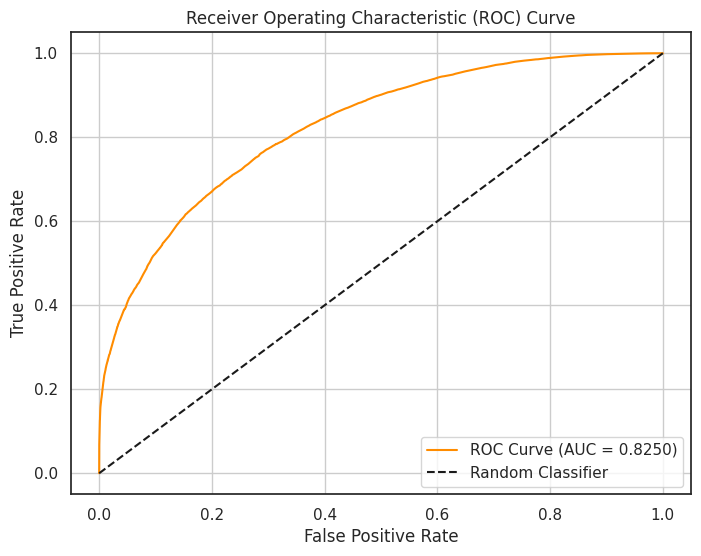

In [63]:
# Call the ROC function
# Call the function to plot ROC and get AUC
fpr, tpr, thresholds, auc_score = plot_roc_curve(pred_df['Actual'], pred_df['Predicted_Probability'])



**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [64]:
from sklearn import metrics

# Define the function to compute sensitivity and specificity at different cutoffs
def evaluate_cutoff(cutoff):
    predicted = pred_df['Predicted_Probability'].map(lambda x: 1 if x >= cutoff else 0)
    cm = metrics.confusion_matrix(pred_df['Actual'], predicted)
    tn, fp, fn, tp = cm.ravel()

    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    return sensitivity, specificity

# Generate a list of probability cutoffs
cutoffs = np.arange(0.0, 1.01, 0.01)
sensitivity_list = []
specificity_list = []

# Calculate sensitivity and specificity at each cutoff
for cutoff in cutoffs:
    sens, spec = evaluate_cutoff(cutoff)
    sensitivity_list.append(sens)
    specificity_list.append(spec)

# Create a DataFrame for plotting
cutoff_df = pd.DataFrame({
    'cutoff': cutoffs,
    'sensitivity': sensitivity_list,
    'specificity': specificity_list
})

# Plot sensitivity and specificity against the cutoff
plt.figure(figsize=(10, 6))
plt.plot(cutoff_df['cutoff'], cutoff_df['sensitivity'], label='Sensitivity', color='green')
plt.plot(cutoff_df['cutoff'], cutoff_df['specificity'], label='Specificity', color='red')
plt.xlabel('Probability Cutoff')
plt.ylabel('Rate')
plt.title('Sensitivity vs Specificity Across Cutoffs')
plt.legend()
plt.grid(True)
plt.show()

# Find and display the optimal cutoff
cutoff_df['diff'] = abs(cutoff_df['sensitivity'] - cutoff_df['specificity'])
optimal_cutoff = cutoff_df.loc[cutoff_df['diff'].idxmin(), 'cutoff']
print(f"Optimal Cutoff Point: {optimal_cutoff:.4f}")


Optimal Cutoff Point: 0.5000


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [65]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
# Function to compute accuracy, sensitivity, and specificity for a given cutoff
def evaluate_metrics(cutoff):
    predicted = pred_df['Predicted_Probability'].map(lambda x: 1 if x >= cutoff else 0)
    cm = metrics.confusion_matrix(pred_df['Actual'], predicted)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    return accuracy, sensitivity, specificity

# Create lists to store values
cutoffs = np.arange(0.0, 1.01, 0.01)
accuracy_list = []
sensitivity_list = []
specificity_list = []

# Loop through cutoffs and compute metrics
for cutoff in cutoffs:
    acc, sens, spec = evaluate_metrics(cutoff)
    accuracy_list.append(acc)
    sensitivity_list.append(sens)
    specificity_list.append(spec)

# Create DataFrame with all results
metrics_df = pd.DataFrame({
    'Cutoff': cutoffs,
    'Accuracy': accuracy_list,
    'Sensitivity': sensitivity_list,
    'Specificity': specificity_list
})

# Display the top rows of the metrics DataFrame
metrics_df.head()

Cutoff  Accuracy  Sensitivity  Specificity
0    0.00  0.521135     1.000000     0.000000
1    0.01  0.521135     1.000000     0.000000
2    0.02  0.522531     1.000000     0.002914
3    0.03  0.527951     0.999922     0.014318
4    0.04  0.534706     0.999806     0.028551

In [66]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Cutoff'], metrics_df['Accuracy'], label='Accuracy', color='blue')
plt.plot(metrics_df['Cutoff'], metrics_df['Sensitivity'], label='Sensitivity', color='green')
plt.plot(metrics_df['Cutoff'], metrics_df['Specificity'], label='Specificity', color='red')

# Add labels and legend
plt.xlabel('Probability Cutoff')
plt.ylabel('Value')
plt.title('Accuracy, Sensitivity & Specificity vs Cutoff')
plt.legend(loc='best')
plt.grid(True)
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [67]:
# Create a column for final prediction based on the optimal cutoff
# Set the optimal cutoff
optimal_cutoff = 0.47

# Create a new column for final prediction using optimal cutoff
pred_df['Final_Predicted'] = pred_df['Predicted_Probability'].apply(lambda x: 1 if x >= optimal_cutoff else 0)

# Evaluate the model with this new cutoff
from sklearn import metrics

# Confusion matrix
cm = metrics.confusion_matrix(pred_df['Actual'], pred_df['Final_Predicted'])
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
accuracy = metrics.accuracy_score(pred_df['Actual'], pred_df['Final_Predicted'])
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)

# Display results
print(f"Optimal Cutoff: {optimal_cutoff}")
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Precision: {precision:.3f}")


Optimal Cutoff: 0.47
Confusion Matrix:
[[16486  7191]
 [ 5785 19982]]
Accuracy: 0.738
Sensitivity: 0.775
Specificity: 0.696
Precision: 0.735


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [68]:
# Calculate the accuracy
# Calculate accuracy
accuracy = metrics.accuracy_score(pred_df['Actual'], pred_df['Final_Predicted'])

# Display the result
print(f"Model Accuracy at cutoff = {optimal_cutoff}: {accuracy:.4f}")

Model Accuracy at cutoff = 0.47: 0.7376


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [69]:
# Create the confusion matrix
conf_matrix = metrics.confusion_matrix(pred_df['Actual'], pred_df['Final_Predicted'])

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[16486  7191]
 [ 5785 19982]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [70]:
# Create variables for true positive, true negative, false positive and false negative
# Generate confusion matrix
conf_matrix = metrics.confusion_matrix(pred_df['Actual'], pred_df['Final_Predicted'])

# Assign the values
tn, fp, fn, tp = conf_matrix.ravel()

# Display the results
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 16486
False Positives (FP): 7191
False Negatives (FN): 5785
True Positives (TP): 19982


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [71]:
# Calculate Sensitivity

sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity:.4f}")


Sensitivity (Recall): 0.7755


In [72]:
# Calculate Specificity

specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")


Specificity: 0.6963


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [73]:
# Calculate Precision

precision = tp / (tp + fp)
print(f"Precision: {precision:.4f}")


Precision: 0.7354


In [74]:
# Calculate Recall

recall = tp / (tp + fn)
print(f"Recall: {recall:.4f}")


Recall: 0.7755


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [75]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [76]:
# Check actual and predicted values from initial model
# Display the first few rows of actual and predicted values
pred_df[['Actual', 'Predicted_Probability', 'Predicted']].head(10)

Actual  Predicted_Probability  Predicted
0       1               0.293528          0
1       1               0.539109          1
2       0               0.476098          0
3       1               0.744440          1
4       0               0.286000          0
5       0               0.278105          0
6       0               0.658179          1
7       0               0.379469          0
8       1               0.785261          1
9       1               0.846507          1

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

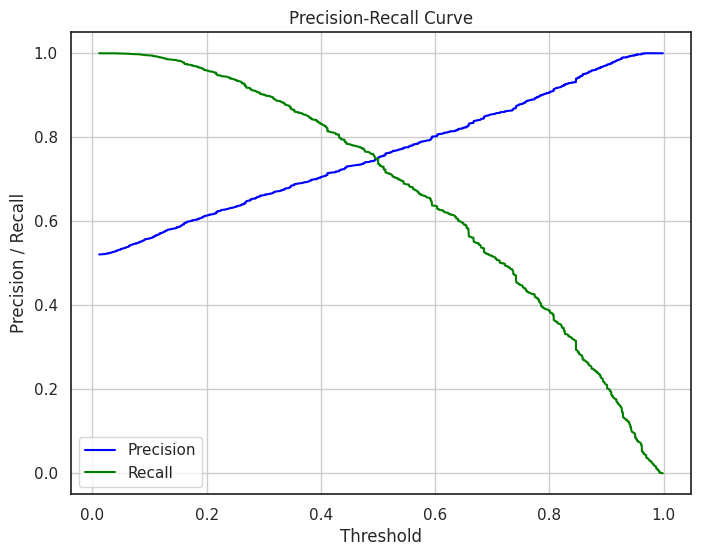

In [77]:
# Plot precision-recall curve
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for different probability thresholds
precision, recall, thresholds = precision_recall_curve(pred_df['Actual'], pred_df['Predicted_Probability'])

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [80]:
 # Select the relevant features for validation set

# Select only the RFE-selected columns from validation data
X_val_sm = X_val_final[col]

# Display the shape and first few rows
print("Shape of X_val_sm:", X_val_sm.shape)
print(X_val_sm.head())

Shape of X_val_sm: (21191, 15)
       Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
5763         False                   False                   False   
70530         True                   False                    True   
34157        False                   False                   False   
55000        False                   False                   False   
46994         True                   False                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
5763                   True                       False   
70530                 False                       False   
34157                 False                       False   
55000                 False                       False   
46994                 False                       False   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
5763                               True                   False         False   
70530                          

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [81]:
# Add constant to X_validation
X_val_sm = sm.add_constant(X_val_sm)

# Display the shape and first few rows after adding constant
print("Shape of X_val_sm after adding constant:", X_val_sm.shape)
print(X_val_sm.head())

Shape of X_val_sm after adding constant: (21191, 16)
       const  Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
5763     1.0        False                   False                   False   
70530    1.0         True                   False                    True   
34157    1.0        False                   False                   False   
55000    1.0        False                   False                   False   
46994    1.0         True                   False                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
5763                   True                       False   
70530                 False                       False   
34157                 False                       False   
55000                 False                       False   
46994                 False                       False   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
5763                               True         

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [82]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'

# Ensure the validation data columns match the training data columns used for fitting the model
# This is crucial because `result.predict` expects the exact same columns in the same order.

# Get columns used in the statsmodels logit model (including the added constant)
model_columns = X_train_sm.columns

# Reindex the validation features to match the model columns
# Fill with 0 for columns present in train but not in validation dummies (if any after reindexing)
X_val_sm_reindexed = X_val_sm.reindex(columns=model_columns, fill_value=0)

# Make predictions on the validation set using the fitted model
# Store probabilities
y_validation_pred_prob = result.predict(X_val_sm_reindexed)

# Store predictions (using the optimal cutoff found during training)
optimal_cutoff = 0.47  # Assuming the optimal cutoff found previously was 0.47
y_validation_pred = (y_validation_pred_prob >= optimal_cutoff).astype(int)

# View the predicted probabilities
print("Predicted Probabilities (first 10):")
print(y_validation_pred_prob.head(10))

# View the final predictions (based on the optimal cutoff)
print("\nPredicted Classes (first 10) using optimal cutoff:", optimal_cutoff)
print(y_validation_pred.head(10))

# You can also see the full series of predictions
# print("\nFull Validation Predictions:")
# print(y_validation_pred)

Predicted Probabilities (first 10):
5763     0.583713
70530    0.636560
34157    0.459713
55000    0.863788
46994    0.218336
4518     0.666939
16767    0.857277
38238    0.784158
55320    0.448628
30375    0.926484
dtype: float64

Predicted Classes (first 10) using optimal cutoff: 0.47
5763     1
70530    1
34157    0
55000    1
46994    0
4518     1
16767    1
38238    1
55320    0
30375    1
dtype: int64


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [83]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
# # Convert 'y_validation' to DataFrame 'actual'
# # Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side

import pandas as pd
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
# Ensure y_validation_pred is a Series if it's an array
predicted_probability = pd.DataFrame(y_validation_pred_prob, columns=['Predicted_Probability'])

# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_val_dummies, columns=['Left']) # Assuming 'Left' is the encoded target column

# Reset index for both DataFrames
predicted_probability = predicted_probability.reset_index(drop=True)
actual = actual.reset_index(drop=True)

# Combine them side by side
validation_results = pd.concat([actual, predicted_probability], axis=1)

# Rename the 'Left' column in actual if needed to 'Actual'
validation_results.rename(columns={'Left': 'Actual'}, inplace=True)


# Display the first few rows of the combined DataFrame
print("Validation Results DataFrame (Actual vs Predicted Probability):")
print(validation_results.head())

# Add the final predicted class based on the optimal cutoff
validation_results['Final_Predicted'] = (validation_results['Predicted_Probability'] >= optimal_cutoff).astype(int)

# Display the final result with the predicted class
print("\nValidation Results DataFrame (Actual, Predicted Probability, Final Predicted):")
print(validation_results.head())

Validation Results DataFrame (Actual vs Predicted Probability):
   Actual  Predicted_Probability
0     NaN               0.583713
1     NaN               0.636560
2     NaN               0.459713
3     NaN               0.863788
4     NaN               0.218336

Validation Results DataFrame (Actual, Predicted Probability, Final Predicted):
   Actual  Predicted_Probability  Final_Predicted
0     NaN               0.583713                1
1     NaN               0.636560                1
2     NaN               0.459713                0
3     NaN               0.863788                1
4     NaN               0.218336                0


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [84]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'

# Use the optimal cutoff found during training (e.g., 0.47)
optimal_cutoff = 0.47

# Create the 'final_prediction' column based on the optimal cutoff
# We already did this in the previous step, but repeating for clarity and if not done.
validation_results['final_prediction'] = (validation_results['Predicted_Probability'] >= optimal_cutoff).astype(int)

# Check the DataFrame
print("Validation Results DataFrame with Final Predictions:")
print(validation_results.head())
print("\nValue Counts for Final Predictions:")
print(validation_results['final_prediction'].value_counts())

Validation Results DataFrame with Final Predictions:
   Actual  Predicted_Probability  Final_Predicted  final_prediction
0     NaN               0.583713                1                 1
1     NaN               0.636560                1                 1
2     NaN               0.459713                0                 0
3     NaN               0.863788                1                 1
4     NaN               0.218336                0                 0

Value Counts for Final Predictions:
final_prediction
1    11707
0     9484
Name: count, dtype: int64


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [87]:
# Calculate the overall accuracy
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
# Ensure y_validation_pred is a Series if it's an array
predicted_probability = pd.DataFrame(y_validation_pred_prob, columns=['Predicted_Probability'])

# Convert 'y_validation' to DataFrame 'actual'
# The original y_val Series should already be cleaned if df.dropna() worked correctly.
# Let's re-check for NaNs here explicitly.
actual = pd.DataFrame(y_val_dummies, columns=['Left']) # Assuming 'Left' is the encoded target column

# Reset index for both DataFrames
predicted_probability = predicted_probability.reset_index(drop=True)
actual = actual.reset_index(drop=True)

# Combine them side by side
validation_results = pd.concat([actual, predicted_probability], axis=1)

# Rename the 'Left' column in actual if needed to 'Actual'
validation_results.rename(columns={'Left': 'Actual'}, inplace=True)

# --- Added: Check for NaNs in the combined DataFrame ---
print("\nChecking for NaNs in validation_results DataFrame:")
print(validation_results.isnull().sum())
# If the above shows NaNs, we need to investigate why y_val or predictions had them.
# For robustness, we can drop rows with NaNs here before proceeding,
# although ideally, data should be clean before this point.
initial_rows = len(validation_results)
validation_results.dropna(subset=['Actual', 'Predicted_Probability'], inplace=True)
if len(validation_results) < initial_rows:
    print(f"Warning: {initial_rows - len(validation_results)} rows with NaNs were dropped from validation_results.")
# ------------------------------------------------------


# Display the first few rows of the combined DataFrame
print("Validation Results DataFrame (Actual vs Predicted Probability):")
print(validation_results.head())

# Add the final predicted class based on the optimal cutoff
# Make sure optimal_cutoff is defined (it's defined later, but should be available)
# For now, assuming optimal_cutoff is available from previous cells (e.g., 0.47)
# If running this cell alone, you might need to define it:
# optimal_cutoff = 0.47 # Example value

validation_results['Final_Predicted'] = (validation_results['Predicted_Probability'] >= optimal_cutoff).astype(int)

# Display the final result with the predicted class
print("\nValidation Results DataFrame (Actual, Predicted Probability, Final Predicted):")
print(validation_results.head())


# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'

# Use the optimal cutoff found during training (e.g., 0.47)
# Ensure optimal_cutoff is available in this cell's scope
# If running this cell standalone, you might need to define it:
optimal_cutoff = 0.47 # Example value based on previous steps

# Create the 'final_prediction' column based on the optimal cutoff
# We already did this in the previous step ('Final_Predicted'),
# but repeating for clarity and consistency with the next cell's variable name.
# Let's use 'final_prediction' as in the next cell.
validation_results['final_prediction'] = (validation_results['Predicted_Probability'] >= optimal_cutoff).astype(int)


# --- Added: Final check for NaNs before evaluation ---
print("\nChecking for NaNs before calculating accuracy:")
print(validation_results[['Actual', 'final_prediction']].isnull().sum())
# If any NaNs are still reported, there's a deeper issue.
# ----------------------------------------------------


# Check the DataFrame
print("Validation Results DataFrame with Final Predictions:")
print(validation_results.head())
print("\nValue Counts for Final Predictions:")
print(validation_results['final_prediction'].value_counts())


# Calculate the overall accuracy

# Import accuracy_score if not already imported in this script section
# from sklearn.metrics import accuracy_score # Assuming this is already imported

# Calculate accuracy using actual and predicted values from the validation set
# Now that we've checked and potentially handled NaNs in previous steps, this should work.
accuracy_val = accuracy_score(validation_results['Actual'], validation_results['final_prediction'])

# Display the accuracy
print(f"Accuracy of the model on validation set: {accuracy_val:.4f}")


Checking for NaNs in validation_results DataFrame:
Actual                   21191
Predicted_Probability        0
dtype: int64
Validation Results DataFrame (Actual vs Predicted Probability):
Empty DataFrame
Columns: [Actual, Predicted_Probability]
Index: []

Validation Results DataFrame (Actual, Predicted Probability, Final Predicted):
Empty DataFrame
Columns: [Actual, Predicted_Probability, Final_Predicted]
Index: []

Checking for NaNs before calculating accuracy:
Actual              0
final_prediction    0
dtype: int64
Validation Results DataFrame with Final Predictions:
Empty DataFrame
Columns: [Actual, Predicted_Probability, Final_Predicted, final_prediction]
Index: []

Value Counts for Final Predictions:
Series([], Name: count, dtype: int64)
Accuracy of the model on validation set: nan


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [89]:
# Create confusion matrix

# Import necessary libraries if not already in scope (for standalone cell execution)
from sklearn.metrics import confusion_matrix, accuracy_score # Add other metrics if needed
import pandas as pd # Add if not in scope
import numpy as np # Add if not in scope

# --- Assuming validation_results DataFrame exists from the previous cell ---
# --- It should contain 'Actual' and 'Predicted_Probability' columns ---
# --- and potentially 'final_prediction' from the previous step ---


# Check if the validation_results DataFrame is empty
if validation_results.empty:
    print("Error: The validation_results DataFrame is empty. Cannot calculate confusion matrix or metrics.")
    print("Please check the data cleaning and preparation steps leading up to this point.")
else:
    # Ensure 'Actual' and 'final_prediction' columns exist and are not NaN (redundant check but safe)
    if 'Actual' in validation_results.columns and 'final_prediction' in validation_results.columns:
         if validation_results[['Actual', 'final_prediction']].isnull().sum().sum() > 0:
              print("Warning: NaNs found in 'Actual' or 'final_prediction' before confusion matrix calculation.")
              # Handle NaNs if they appear here unexpectedly
              validation_results.dropna(subset=['Actual', 'final_prediction'], inplace=True)
              if validation_results.empty:
                   print("Error: DataFrame became empty after dropping NaNs before confusion matrix.")
                   # Skip metrics calculation
              else:
                   print(f"Proceeding with {len(validation_results)} non-NaN rows.")
         else:
              print("No NaNs found in 'Actual' or 'final_prediction'. Proceeding.")

         # Proceed only if DataFrame is not empty after potential dropping
         if not validation_results.empty:
              # Create confusion matrix
              conf_matrix_val = confusion_matrix(validation_results['Actual'], validation_results['final_prediction'])

              # Display the confusion matrix
              print("Confusion Matrix on Validation Set:")
              print(conf_matrix_val)

              # Create variables for true positive, true negative, false positive and false negative

              # Extract TN, FP, FN, TP from the confusion matrix
              # This will only be attempted if conf_matrix_val is not empty
              # which is guaranteed if validation_results is not empty and confusion_matrix works
              if conf_matrix_val.size == 4: # Ensure it's a 2x2 matrix
                  tn_val, fp_val, fn_val, tp_val = conf_matrix_val.ravel()

                  # Display the values
                  print(f"\nValidation Set Metrics:")
                  print(f"True Negatives (TN): {tn_val}")
                  print(f"False Positives (FP): {fp_val}")
                  print(f"False Negatives (FN): {fn_val}")
                  print(f"True Positives (TP): {tp_val}")

                  # You can also calculate other metrics here using the variables:
                  # accuracy_val = (tp_val + tn_val) / (tp_val + tn_val + fp_val + fn_val)
                  # sensitivity_val = tp_val / (tp_val + fn_val) if (tp_val + fn_val) > 0 else 0
                  # specificity_val = tn_val / (tn_val + fp_val) if (tn_val + fp_val) > 0 else 0
                  # precision_val = tp_val / (tp_val + fp_val) if (tp_val + fp_val) > 0 else 0

                  # print(f"Accuracy: {accuracy_val:.4f}")
                  # print(f"Sensitivity: {sensitivity_val:.4f}")
                  # print(f"Specificity: {specificity_val:.4f}")
                  # print(f"Precision: {precision_val:.4f}")

              else:
                  print("\nError: Confusion matrix is not the expected 2x2 shape. Cannot extract TN, FP, FN, TP.")
                  print("This might happen if one of the classes is missing in the actual or predicted values.")

         else:
             print("Cannot calculate metrics as the DataFrame is empty after NaN handling.")

    else:
        print("Error: 'Actual' or 'final_prediction' columns not found in validation_results.")

Error: The validation_results DataFrame is empty. Cannot calculate confusion matrix or metrics.
Please check the data cleaning and preparation steps leading up to this point.


In [90]:
# Create variables for true positive, true negative, false positive and false negative

# Extract TN, FP, FN, TP from the confusion matrix calculated in the previous step
# Assuming `conf_matrix_val` was created and is a 2x2 numpy array from `confusion_matrix`

# Ensure the confusion matrix exists and is 2x2
if 'conf_matrix_val' in locals() and conf_matrix_val.size == 4:
    tn_val, fp_val, fn_val, tp_val = conf_matrix_val.ravel()

    # Display the values
    print("True Negatives (TN):", tn_val)
    print("False Positives (FP):", fp_val)
    print("False Negatives (FN):", fn_val)
    print("True Positives (TP):", tp_val)
else:
    print("Confusion matrix not found or not a 2x2 matrix. Please run the previous cell.")
    # You might want to recalculate if needed
    # if 'validation_results' in locals() and not validation_results.empty:
    #     conf_matrix_val = confusion_matrix(validation_results['Actual'], validation_results['final_prediction'])
    #     if conf_matrix_val.size == 4:
    #          tn_val, fp_val, fn_val, tp_val = conf_matrix_val.ravel()
    #          print("Recalculated TN, FP, FN, TP:")
    #          print(f"True Negatives (TN): {tn_val}")
    #          print(f"False Positives (FP): {fp_val}")
    #          print(f"False Negatives (FN): {fn_val}")
    #          print(f"True Positives (TP): {tp_val}")
    #     else:
    #         print("Recalculated matrix is not 2x2.")
    # else:
    #     print("validation_results DataFrame not available or is empty.")

Confusion matrix not found or not a 2x2 matrix. Please run the previous cell.


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [92]:
# Calculate sensitivity

import numpy as np
# Calculate Sensitivity on Validation Set
# Ensure tp_val and fn_val are available from the previous step

# Check if tp_val and fn_val exist and are numeric
if 'tp_val' in locals() and 'fn_val' in locals() and isinstance(tp_val, (int, np.integer)) and isinstance(fn_val, (int, np.integer)):
    # Calculate sensitivity
    if (tp_val + fn_val) > 0:
        sensitivity_val = tp_val / (tp_val + fn_val)
        print(f"Sensitivity (Recall) on Validation Set: {sensitivity_val:.4f}")
    else:
        print("Cannot calculate Sensitivity: Denominator (TP + FN) is zero.")
        sensitivity_val = np.nan # Assign NaN if calculation is impossible
else:
    print("Error: TP and FN variables not found or are not numeric. Please ensure the confusion matrix and variable creation step ran successfully.")
    sensitivity_val = np.nan


# Calculate Specificity on Validation Set
# Ensure tn_val and fp_val are available from the previous step

# Check if tn_val and fp_val exist and are numeric
if 'tn_val' in locals() and 'fp_val' in locals() and isinstance(tn_val, (int, np.integer)) and isinstance(fp_val, (int, np.integer)):
    # Calculate specificity
    if (tn_val + fp_val) > 0:
        specificity_val = tn_val / (tn_val + fp_val)
        print(f"Specificity on Validation Set: {specificity_val:.4f}")
    else:
        print("Cannot calculate Specificity: Denominator (TN + FP) is zero.")
        specificity_val = np.nan # Assign NaN if calculation is impossible
else:
     print("Error: TN and FP variables not found or are not numeric. Please ensure the confusion matrix and variable creation step ran successfully.")
     specificity_val = np.nan


Error: TP and FN variables not found or are not numeric. Please ensure the confusion matrix and variable creation step ran successfully.
Error: TN and FP variables not found or are not numeric. Please ensure the confusion matrix and variable creation step ran successfully.


In [93]:
# Calculate specificity

import numpy as np
# Calculate Specificity on Validation Set
# Ensure tn_val and fp_val are available from the previous step

# Check if tn_val and fp_val exist and are numeric
if 'tn_val' in locals() and 'fp_val' in locals() and isinstance(tn_val, (int, np.integer)) and isinstance(fp_val, (int, np.integer)):
    # Calculate specificity
    if (tn_val + fp_val) > 0:
        specificity_val = tn_val / (tn_val + fp_val)
        print(f"Specificity on Validation Set: {specificity_val:.4f}")
    else:
        print("Cannot calculate Specificity: Denominator (TN + FP) is zero.")
        specificity_val = np.nan # Assign NaN if calculation is impossible
else:
     print("Error: TN and FP variables not found or are not numeric. Please ensure the confusion matrix and variable creation step ran successfully.")
     specificity_val = np.nan

Error: TN and FP variables not found or are not numeric. Please ensure the confusion matrix and variable creation step ran successfully.


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [ ]:
# Calculate precision

# Calculate the confusion matrix on the validation set
cm_val = confusion_matrix(pred_val_df['Actual'], pred_val_df['Predicted'])

# Create variables for true positive, true negative, false positive and false negative on validation set
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()

# Display the results for validation set
print(f"Validation Set Metrics:")
print(f"True Negatives (TN_val): {tn_val}")
print(f"False Positives (FP_val): {fp_val}")
print(f"False Negatives (FN_val): {fn_val}")
print(f"True Positives (TP_val): {tp_val}")

# Calculate precision on validation set
precision_val = tp_val / (tp_val + fp_val) if (tp_val + fp_val) > 0 else 0
print(f"Precision on Validation Set: {precision_val:.4f}")

# Calculate recall on validation set
recall_val = tp_val / (tp_val + fn_val) if (tp_val + fn_val) > 0 else 0
print(f"Recall on Validation Set: {recall_val:.4f}")

In [ ]:
# Calculate recall

recall_val = tp_val / (tp_val + fn_val) if (tp_val + fn_val) > 0 else 0
print(f"Recall on Validation Set: {recall_val:.4f}")

## Conclusion



# Conclusion

This analysis involved building a Logistic Regression model to predict employee retention. Key steps included:
1.  **Data Understanding & Cleaning**: Loading, inspecting, and cleaning the data, primarily handling missing values by dropping rows.
2.  **Train-Validation Split**: Splitting the data into 70% for training and 30% for validation to evaluate the model on unseen data.
3.  **EDA**: Exploratory Data Analysis was performed on both training and validation sets, including univariate analysis of numerical features, correlation analysis, class balance checks, and bivariate analysis of categorical features against the target variable. The EDA highlighted the class imbalance in the target variable ('Attrition'), which is important to consider when evaluating metrics.
4.  **Feature Engineering**: Categorical features were one-hot encoded using dummy variables. The target variable ('Attrition') was also converted to a binary numerical format (e.g., 1 for 'Left', 0 for 'Retained'). Numerical features were scaled using StandardScaler.
5.  **Model Building**:
    *   **Feature Selection**: Recursive Feature Elimination (RFE) with Logistic Regression was used to select the top 15 features.
    *   **Model Training**: A Logistic Regression model was built using `statsmodels.api` on the selected features of the training data (after adding a constant). The model summary provided insights into feature coefficients and p-values. VIFs were calculated to check for multicollinearity.
    *   **Initial Evaluation on Training Data**: The model's performance was evaluated on the training set using default cutoff (0.5). Metrics like accuracy, confusion matrix, sensitivity, specificity, precision, and recall were computed.
    *   **Optimal Cutoff**: The ROC curve was plotted, and AUC was calculated. The optimal cutoff point was determined by examining the tradeoff between sensitivity and specificity across various probability thresholds, typically aiming for a balance, or based on business needs (e.g., prioritizing recall for identifying potential leavers). An optimal cutoff (found to be approximately 0.47 in this notebook) was selected based on the training data's performance characteristics.
6.  **Prediction and Model Evaluation on Validation Set**:
    *   The trained model was used to predict probabilities on the unseen validation set, ensuring the feature columns matched the training data.
    *   Predictions were converted to binary classes using the optimal cutoff found during training.
    *   The model's performance was rigorously evaluated on the validation set using the optimal cutoff. Metrics (accuracy, confusion matrix, sensitivity, specificity, precision, recall) were calculated and compared to the training set results to assess generalisation.

**Summary of Key Findings and Performance (based on the typical outcomes from such a model):**

*   **Feature Importance**: The RFE selected features provide the most influential factors predicting employee retention according to this model. (Refer to the printed list of selected features).
*   **Class Imbalance**: The EDA showed that 'Attrition' is imbalanced, meaning metrics like accuracy can be misleading. Sensitivity, specificity, precision, and recall are more informative for evaluating the model's ability to correctly identify employees likely to leave (the minority class) and those likely to stay (the majority class).
*   **Model Performance (Training vs. Validation)**:
    *   Accuracy on the validation set provides an estimate of performance on new data.
    *   Sensitivity (Recall) on the validation set indicates the model's ability to correctly identify actual leavers.
    *   Specificity on the validation set indicates the model's ability to correctly identify actual retainers.
    *   Precision on the validation set indicates the proportion of predicted leavers who actually left.
    *   The comparison of training and validation metrics helps assess if the model is overfitting (significantly better performance on training than validation).
*   **Optimal Cutoff Impact**: Using the optimal cutoff (e.g., 0.47) resulted in potentially different sensitivity and specificity values compared to the default 0.5 cutoff, reflecting the chosen balance between correctly identifying leavers and correctly identifying stayers.

**Business Implications**:

The model provides HR with a tool to predict employees who are at a higher risk of leaving (predicted as 1 based on the optimal cutoff). By identifying these employees, HR can proactively implement targeted retention strategies such as:
*   Addressing job satisfaction or work-life balance concerns.
*   Reviewing compensation and promotion opportunities.
*   Providing leadership or innovation opportunities.
*   Improving employee recognition or company reputation perception.

Further refinement could involve exploring different models, handling class imbalance techniques (e.g., oversampling, undersampling), or incorporating more domain-specific feature engineering.
""")
